In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Titanic-Dataset.csv")

In [3]:
df.head()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
x=df[["Pclass","Sex","Age"]]
y=df.Survived

In [6]:
x.isnull().sum()

Pclass      0
Sex         0
Age       177
dtype: int64

In [7]:
x.Age.fillna(x.Age.mean(),inplace=True)

In [8]:
x

,Pclass,Sex,Age
0,3,male,22.000000
1,1,female,38.000000
2,3,female,26.000000
3,1,female,35.000000
4,3,male,35.000000
...,...,...,...
886,2,male,27.000000
887,1,female,19.000000
888,3,female,29.699118
889,1,male,26.000000


converting string to numerical

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
gen=le.fit_transform(x.Sex)

In [10]:
x["Gender"]=gen
x.drop("Sex",axis=1,inplace=True)

In [11]:
x.isnull().sum()

Pclass    0
Age       0
Gender    0
dtype: int64

In [12]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2)

In [15]:
len(train_x)

712

In [16]:
len(test_x)

179

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
model=LogisticRegression()

In [19]:
model.fit(train_x,train_y)

LogisticRegression()

In [20]:
model.score(test_x,test_y)

0.8044692737430168

In [21]:
x.head()

,Pclass,Age,Gender
0,3,22.0,1
1,1,38.0,0
2,3,26.0,0
3,1,35.0,0
4,3,35.0,1


In [22]:
if model.predict([[3,70,1]])[0]==1:
    print("survived")
else:
    print("not survived")

not survived


In [23]:
df.head()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [24]:
titanic = df

In [25]:
titanic.set_index('PassengerId', inplace=True)

In [26]:
titanic['isMale'] = (titanic.Sex == 'male') * 1

<Axes: ylabel='isMale'>

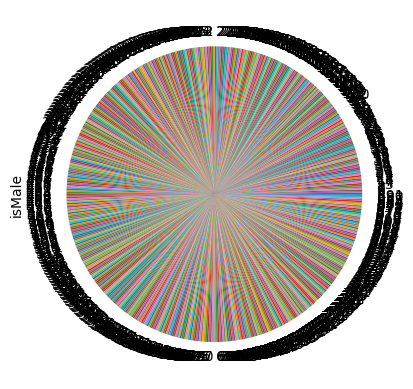

In [27]:
titanic.isMale.plot(kind='pie')

In [28]:
import matplotlib.pyplot as plt

In [29]:
titanic.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: ylabel='count'>

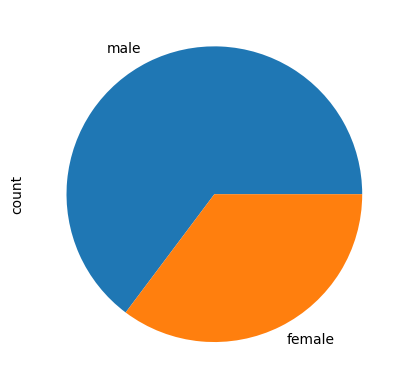

In [30]:
titanic.Sex.value_counts().plot(kind='pie')

scatterplot with fare paid and the age, differ the plot color by gender

In [31]:
import seaborn as sns

<Axes: xlabel='Age', ylabel='Fare'>

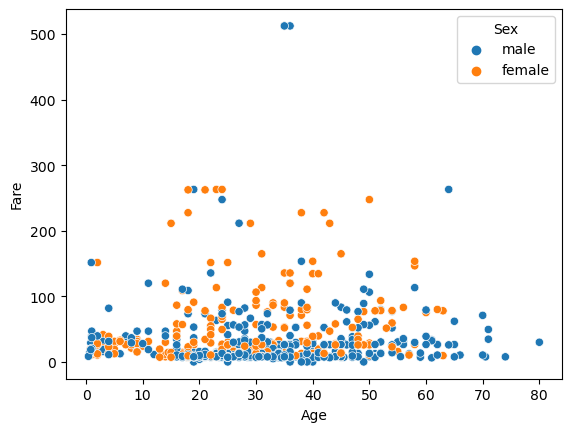

In [32]:
sns.scatterplot(x='Age', y='Fare', hue='Sex', data=titanic)

In [33]:
titanic.Survived.sum()

342

histogram with fare paid

<Axes: xlabel='Fare', ylabel='Density'>

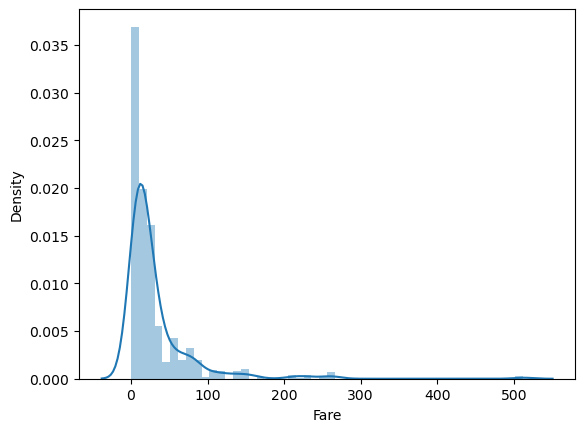

In [34]:
sns.distplot(titanic.Fare)

In [36]:
import pickle
with open('titanic_model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [37]:
pip install flask

Note: you may need to restart the kernel to use updated packages.
